# Segmentación de imágenes
## 1. Introducción
Normalmente, para extraer características basadas en descriptores de forma, es necesario, previamente, llevar a cabo alguna técnica de segmentación que permita delimitar la región de interés que se desea analizar.     

Los algoritmos de segmentación se basan en particionar la imagen digital en diferentes segmentos (objetos) para simplificar la representación de la imagen y facilitar la comprensión de su contenido.   

Las técnicas de segmentación permiten asignar una etiqueta a cada píxel de la imagen de manera que los píxeles con la misma etiqueta comparten características similares.   

Existen dos tipos de segmentación:
- **Segmentación semántica**. Consiste en un problema de clasificación a nivel de píxel que permite asignar una etiqueta de objeto a cada píxel para delimitar regiones de interés. Por ejemplo, diferenciar un grupo de personas del fondo de la imagen.
- **Segmentación de instancia**. Consiste en una tarea más compleja que implica llevar a cabo una detección de objetos para asignar una etiqueta de instancia a cada objeto. Es decir, la segmentación de instancia permite identificar objetos que comparten las mismas propiedades como objetos independientes. Por ejemplo, diferenciar cada persona de un grupo de personas en una imagen.

## 2. Técnicas de segmentación.

- Métodos de thresholding (umbralización)
- Métodos basados en el espacio de color.
- Detección de bordes.
- Métodos de clustering.
- Watershed.
- Crecimiento de regiones (region growing).
- Autoencoders (RN Convolucionales).   

### 2.1. Tresholding
<img src="./img/thresholding.png">   

El **método de Otsu** es un procedimiento no paramétrico que permite obtener el umbral óptimo maximizando la varianza entre clases.    

*Búsqueda exhaustiva.*
*Algoritmo:* Se parte de una imagen con N píxeles que puede tomar L valores de grises diferentes, siguiendo la pauta que se expone a continuación:    

1. Los píxeles se dividen en dos clases:   
            $c_1 = [0, 1, 2, ..., t]$   
            $c_2 = [t+1, t+2, ..., L]$

2. Se define la probabilidad del nivel de gris $i$   
$p_i = \frac{f_i}{N}$   
Siendo $f_i$ la frecuencia de repetición del nivel de gris $i$   
3. Se calculan las medias para cada una de las clases:   
$$\mu_1 = \sum_{i = 1}^{t}\frac{i*p_i}{\omega_1(t)}$$   
$$\mu_2 = \sum_{i = t+1}^{L}\frac{i*p_i}{\omega_2(t)}$$   
dónde:   
$$\omega_1(t) = \sum_{i = 1}^{t}p_i$$   
$$\omega_2(t) = \sum_{i = t+1}^{L}p_i$$      
4. Se obtiene la intensidad media total de la imagen: $\mu_\tau = \omega_1 * \mu_1 + \omega_2 * \mu_2$   
5. Se calcula la varianza entre las clases:  $\sigma^2 = \omega_1 * (\mu_1 - \mu_\tau)^2 + \omega_2 * (\mu_2 - \mu_\tau)^2$      
6. Se selecciona como umbral (threshold) óptimo aquel que maximiza la varianza: $t^* = max \{\sigma^2(t)\}$   

<img src="./img/thresholding2.jpg" width=300>   


*Comprensión del Histograma en el método Otsu*

1. Histograma bimodal:
    - El método Otsu funciona de manera óptima cuando el histograma de la imagen muestra una distribución bimodal clara. Esto significa que hay dos picos distintos, que corresponden a dos clases de píxeles (por ejemplo, objeto y fondo).
2. Separación de clases:
    - El objetivo de Otsu es encontrar el umbral que mejor separe estas dos clases. Visualmente, esto significa buscar el "valle" entre los dos picos del histograma.   

*Visualización y Determinación del Umbral*   

1. Observa los picos:
    - Identifica los **dos picos principales en el histograma**. Estos picos representan las intensidades de píxeles más frecuentes en cada clase.
2. Encuentra el valle:
    - Busca el **punto más bajo entre los dos picos**. Este "valle" representa la intensidad de píxel que mejor separa las dos clases.
3. El umbral óptimo:
    - La intensidad de píxel en este "valle" es el umbral óptimo determinado por el método de Otsu.

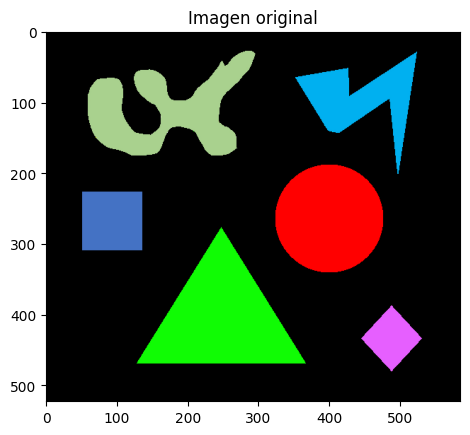

In [1]:
# SEGMENTACIÓN MEDIANTE THRESHOLDING
# "Leer" una imagen
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('./img/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.title('Imagen original')
plt.show()

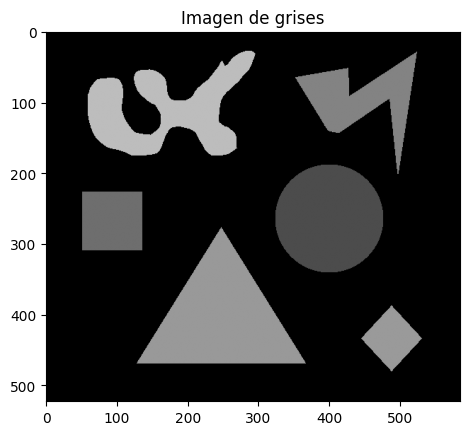

In [2]:
# Convertimos la imagen a escala de grises
import numpy as np
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray_img = cv2.imread('figuras.png', 0)

plt.imshow(gray_img, cmap='gray')
plt.title('Imagen de grises')
plt.show()

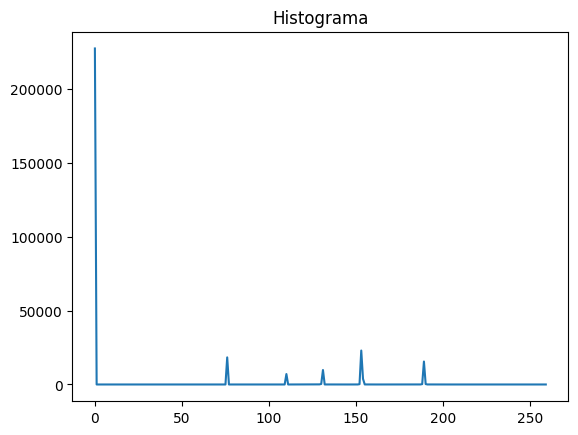

In [3]:
# Calculamos el histograma
hist = cv2.calcHist([gray_img], [0], None, [260], [0, 260]) # [0] son los canales, None la máscara

plt.plot(hist)
plt.title('Histograma')
plt.show()

# Otra forma de mostrar el histograma
# plt.hist(gray_img.ravel())
# plt.grid(True)
# plt.show()

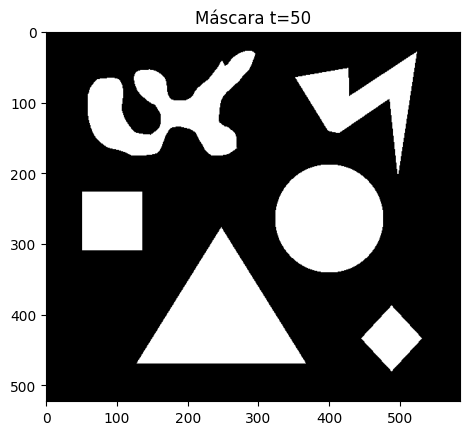

In [4]:
# Fijamos el umbral en base al histograma anterior
t = 50

# Extraemos la máscara binaria
maxim = int(np.max(np.unique(gray_img)))
_, mask = cv2.threshold(gray_img, t, int(maxim), cv2.THRESH_BINARY)

# Otra formas de extraer la máscara
# mask = gray_img.copy()
# mask[mask>t]=255

# Visualizamos para corroborar
plt.imshow(mask, cmap='gray')
plt.title('Máscara t=' + str(t))
plt.show()

[0 1]


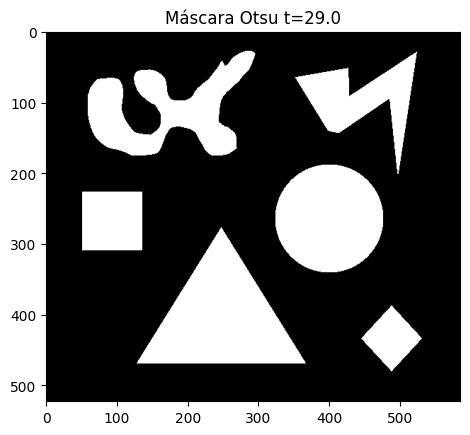

In [5]:
# Fijamos el umbral con el método de OTSU
t, mask = cv2.threshold(gray_img,0,1,cv2.THRESH_BINARY+cv2.THRESH_OTSU) # 0 es por defecto y 1 es el valor máximo de la máscara
print(np.unique(mask))

# Visualizamos para corroborar que se obtiene el mismo resultado
plt.imshow(mask, cmap='gray')
plt.title('Máscara Otsu t=' + str(t))
plt.show()

###############################################################################################################################   
## 2. Espacios de color.      

Siguiendo el método Otsu, realizamos la umbralización para enmascarar un determinado canal.   

<img src="./img/espaciocolor.png">


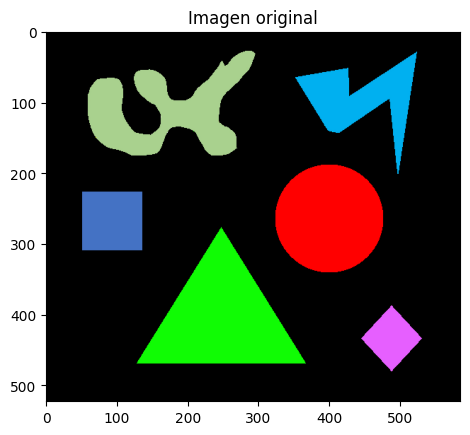

In [6]:
# SEGMENTACIÓN MEDIANTE CONVERSIONES DE COLOR

# Imaginamos que queremos segmentar únicamente el círculo
img = cv2.imread('img/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Imagen original')
plt.show()

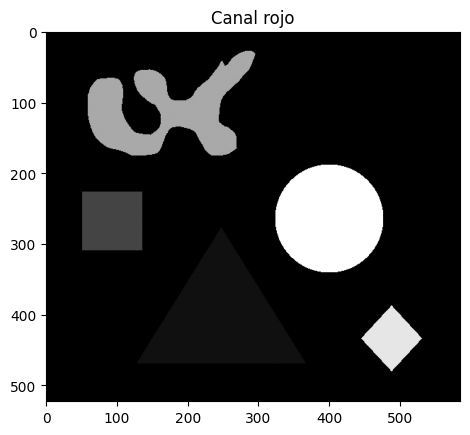

In [7]:
# Obtenemos el canal rojo
R = img[:,:,2]

plt.imshow(R, cmap='gray')
plt.title('Canal rojo')
plt.show()

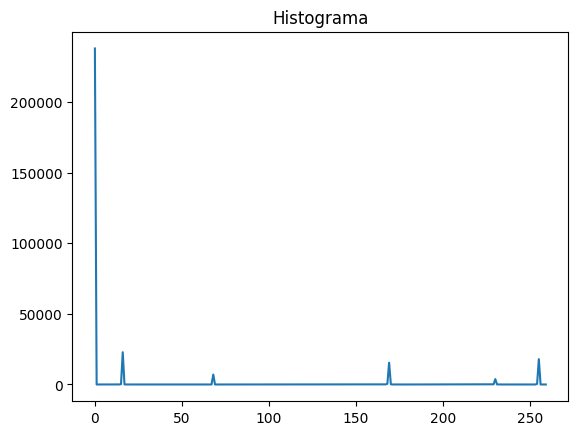

In [8]:
# Observamos el histograma
hist = cv2.calcHist([R], [0], None, [260], [0, 260])

plt.plot(hist)
plt.title('Histograma')
plt.show()

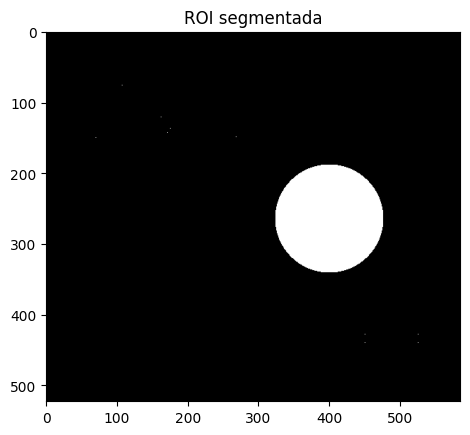

In [9]:
# Fijamos el umbral y extraemos la máscara
t=250
mask = R.copy()
mask[mask<250] = 0

plt.imshow(mask, cmap='gray')
plt.title('ROI segmentada')
plt.show()

###############################################################################################################################   
## 3. Segmentación semántica. Detección de bordes.   
 
Cuando hablamos de bordes de una imagen, hablamos de los píxeles donde hay un **cambio de intensidad.**     
   
<img src="./img/bordes.jpg">   

***Detección de bordes. CANNY***   

1. **Detector de bordes con Sobel.**   
    El operador Sobel se basa en el cálculo de la primera derivada para obtener el gradiente de la intensidad de una imagen en cada píxel. Es decir, mide cambios de intensidad en la imagen. Para ello, aplica dos máscaras de convoluciones con kernels de 3x3 elementos, uno para los cambios horizontales y otro para los verticales. De esta manera, se obtienen $G_x$ y $G_y$ que representan las aproximaciones de las derivadas de intensidades.   
   En cada píxel de la imagen, se combinan las aproximaciones de las derivadas para obtener la magnitud $G$ y la dirección 𝚯 del gradiente. La dirección de los píxeles puede ser en estos ángulos (0, 45, 90, o 135)    
   
<img src="./img/bordes2.jpg" width=400>   

2. **Filtrado de bordes mediante la supresión non-máximum:** Esta técnica permite adelgazar los bordes basándose en el gradiente. El objetivo es eliminar los píxeles que no corresponden a un borde. Es decir, nos quedaremos únicamente con los valores de grosor 1. 

3. **Umbralización por histéresis:** El umbral por histéresis se centra en establecer dos umbrales (uno máximo y otro mínimo). 
    - Si el valor del píxel es mayor que el umbral máximo, el píxel se considera parte del borde. 
    - Si el valor del píxel es menor que el umbral mínimo, el píxel no se considera parte del borde. 
    - Si el valor del píxel está entre el mínimo y el máximo umbral, será borde si está conectado a un píxel que sí es parte del borde.   







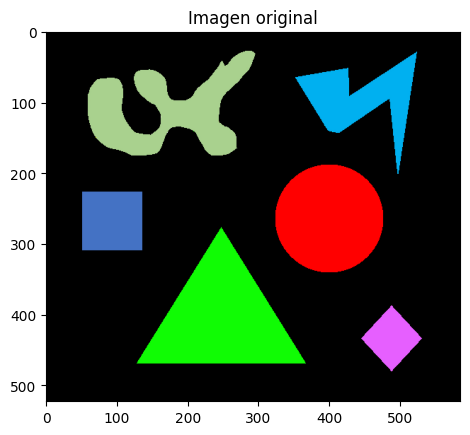

In [10]:
# SEGMENTACIÓN SEMÁNTICA CON DETECCIÓN DE BORDES
img = cv2.imread('img/figuras.png')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.title('Imagen original')
plt.show()

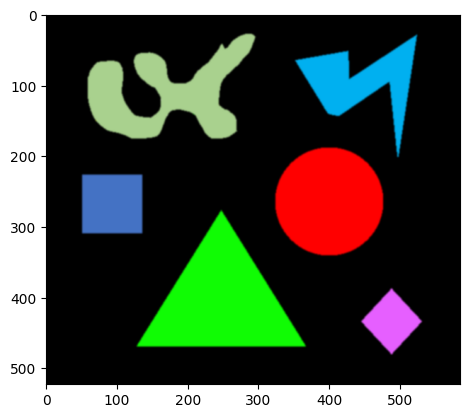

In [11]:
# Aplicamos un filtro gaussiano para emborronar las altas frecuencias
img_gaus = cv2.GaussianBlur(img_rgb, (5,5), 0) # (5x5) es el tamaño del filtro y 0 es la desviación estándar
plt.imshow(img_gaus, cmap='gray')
plt.show()

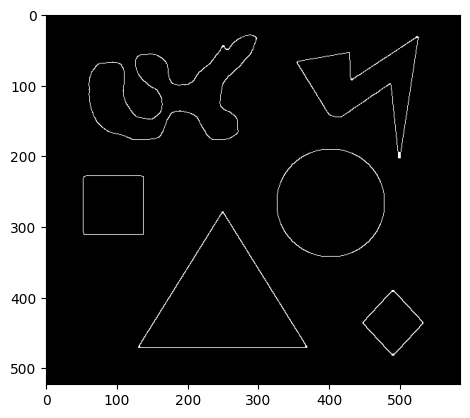

In [12]:
# Detección de bordes de Canny
canny = cv2.Canny(img_gaus, 255/3, 255) # minValue and maxValue. Canny recomiendo que minValue sea 3 veces mayor que maxValue
kernel = np.ones((2,2), 'uint8')
canny = cv2.dilate(canny, kernel, iterations=2)
canny = cv2.erode(canny, kernel, iterations=2)

plt.imshow(canny, cmap='gray')
plt.show()

/tmp/ipykernel_19799/2345110352.py:2: DeprecationWarning: Please import `binary_fill_holes` from the `scipy.ndimage` namespace; the `scipy.ndimage.morphology` namespace is deprecated and will be removed in SciPy 2.0.0.
  from scipy.ndimage.morphology import binary_fill_holes as bfh


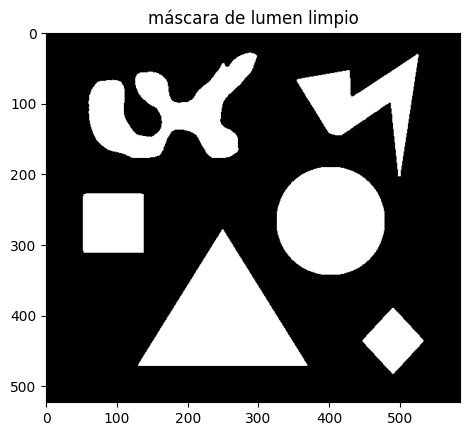

In [13]:
# Rellenar objetos (solo rellena si no están en contacto con el límite de la imagen)
from scipy.ndimage.morphology import binary_fill_holes as bfh
bordes = canny.copy()
filled_bordes = bfh(bordes)

plt.imshow(filled_bordes.astype('uint8'), cmap='gray')
plt.title('máscara de lumen limpio')
plt.show()

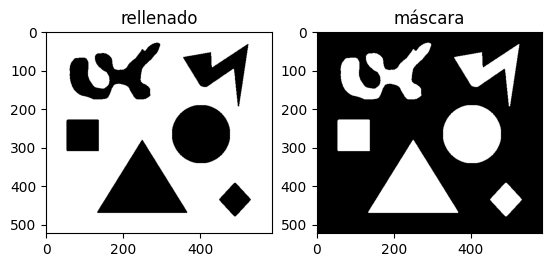

In [14]:
# Otra forma de rellenar los bordes (Algoritmo de expansión a partir de semillas)
h, w = canny.shape
ref = np.zeros((h+2, w+2), np.uint8)
# Se fija la semilla en la esquina superior izquierda (posición 0,0) para rellenar a partir de ahí
cv2.floodFill(canny, ref, (0,0), 255); 

# Se calcula el inverso del rellenado para obtener la máscara deseada
mask = cv2.bitwise_not(canny)

fig, ax = plt.subplots(1,2)
ax[0].imshow(canny, cmap='gray'), ax[0].set_title('rellenado')
ax[1].imshow(mask, cmap='gray'), ax[1].set_title('máscara')
plt.show()